<a href="https://colab.research.google.com/github/het1752/Deep-Learning/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
data.corr()['Outcome']

Pregnancies                 0.221898
Glucose                     0.466581
BloodPressure               0.065068
SkinThickness               0.074752
Insulin                     0.130548
BMI                         0.292695
DiabetesPedigreeFunction    0.173844
Age                         0.238356
Outcome                     1.000000
Name: Outcome, dtype: float64

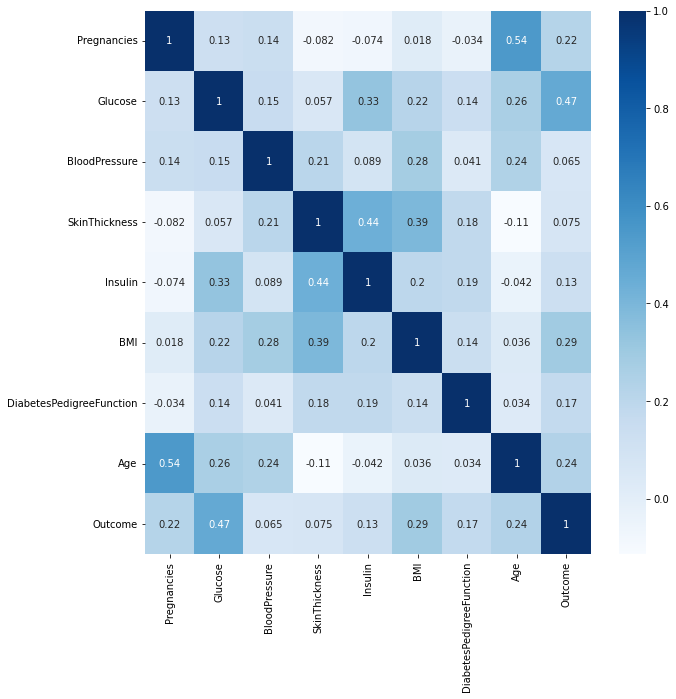

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [9]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f41124be280>,
      dtype=object)

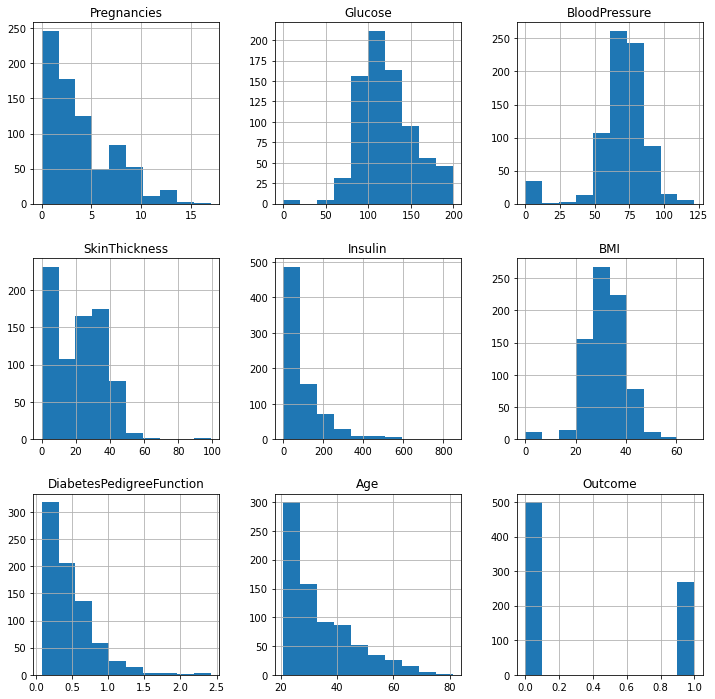

In [12]:
data.hist(figsize=(12,12))

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

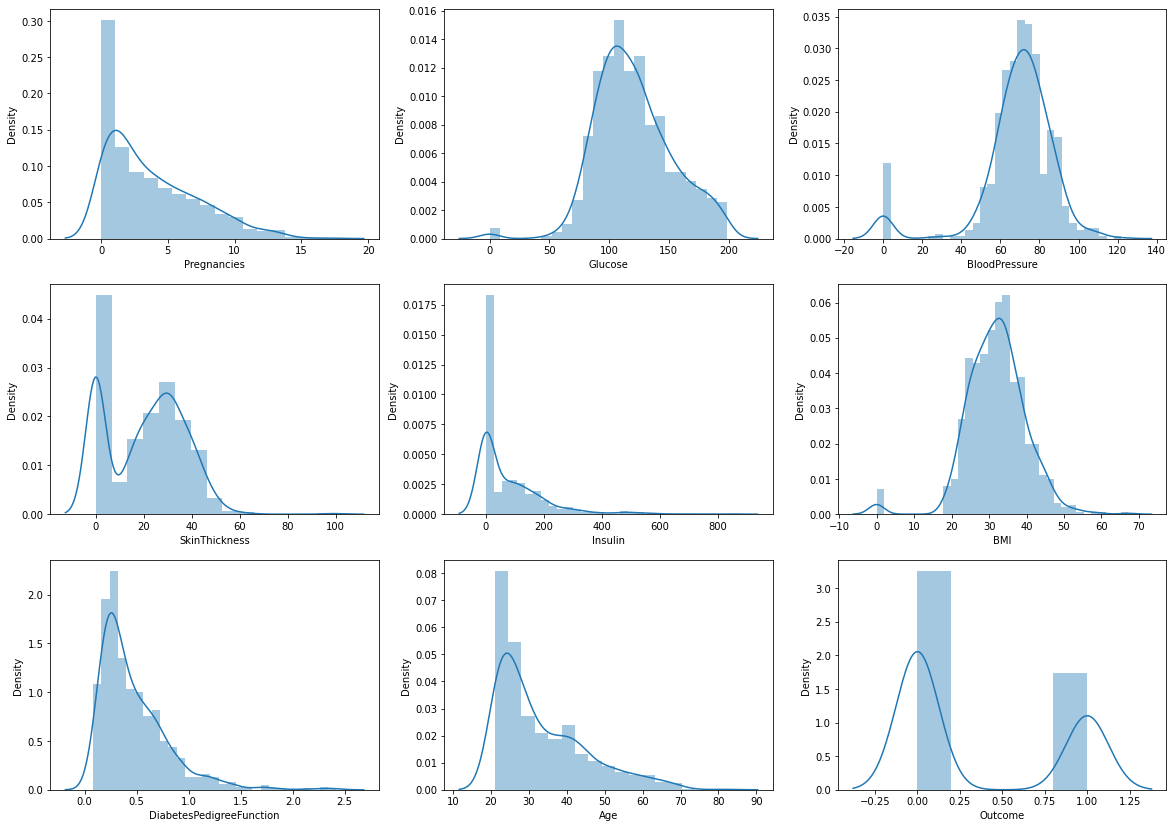

In [13]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data:
    ax = plt.subplot(12,3,plotnumber)
    sns.distplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

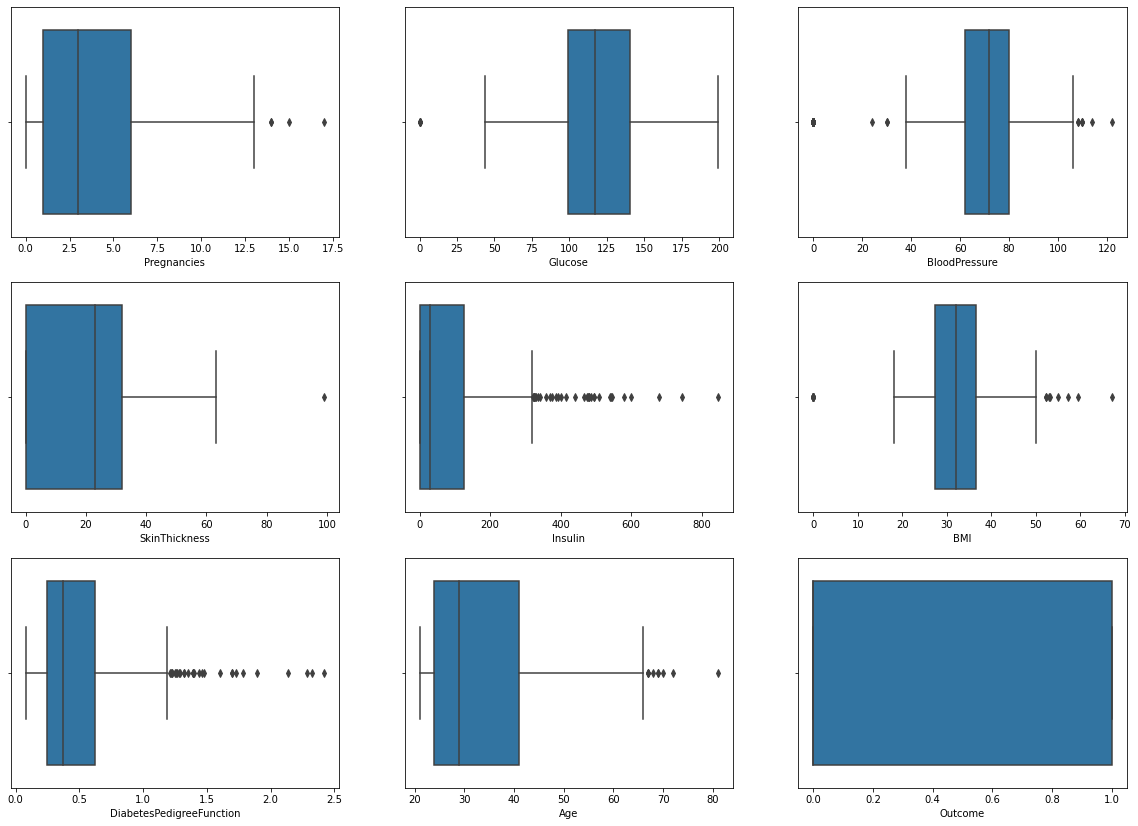

In [14]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber =1
for feature in data:
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(data[feature])
    plt.xlabel(feature)
    plotnumber+=1
plt.show()

In [15]:
x=data.drop(['Outcome'],axis=1)
y=data['Outcome']
x.shape,y.shape

((768, 8), (768,))

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
print(len(x_train),len(y_train),len(x_test),len(y_test))
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

614 614 154 154
(614, 8) (154, 8) (614,) (154,)


In [17]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,BatchNormalization,Dropout
import tensorflow as tf

In [28]:
model=Sequential()
model.add(tf.keras.layers.Dense(16,input_dim=(8),activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 16)                144       
                                                                 
 dense_5 (Dense)             (None, 10)                170       
                                                                 
 dense_6 (Dense)             (None, 10)                110       
                                                                 
 dense_7 (Dense)             (None, 10)                110       
                                                                 
 dense_8 (Dense)             (None, 10)                110       
                                                                 
 dense_9 (Dense)             (None, 10)                110       
                                                                 
 dense_10 (Dense)            (None, 10)               

In [29]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [30]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),batch_size=20,epochs=100)

Epoch 1/100
31/31 [==============================] - 1s 11ms/step - loss: 0.8161 - accuracy: 0.3746 - val_loss: 0.6946 - val_accuracy: 0.5519
Epoch 2/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6920 - accuracy: 0.6042 - val_loss: 0.6800 - val_accuracy: 0.6558
Epoch 3/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6809 - accuracy: 0.6482 - val_loss: 0.6753 - val_accuracy: 0.6494
Epoch 4/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6711 - accuracy: 0.6515 - val_loss: 0.6718 - val_accuracy: 0.6429
Epoch 5/100
31/31 [==============================] - 0s 5ms/step - loss: 0.6667 - accuracy: 0.6515 - val_loss: 0.6690 - val_accuracy: 0.6429
Epoch 6/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6641 - accuracy: 0.6531 - val_loss: 0.6650 - val_accuracy: 0.6429
Epoch 7/100
31/31 [==============================] - 0s 4ms/step - loss: 0.6612 - accuracy: 0.6531 - val_loss: 0.6641 - val_accuracy: 0.6429
Epoch 8/100


In [31]:
y_pred=model.predict(x_test)
print(y_pred)
print(type(y_pred))

5/5 [==============================] - 0s 4ms/step
[[0.17773145]
 [0.26065838]
 [0.33166936]
 [0.2010104 ]
 [0.636245  ]
 [0.11325889]
 [0.22075272]
 [0.05519925]
 [0.8166516 ]
 [0.09454014]
 [0.46515656]
 [0.48491842]
 [0.73039675]
 [0.53507984]
 [0.14723574]
 [0.77501357]
 [0.12850437]
 [0.12661596]
 [0.23695928]
 [0.43149653]
 [0.34015402]
 [0.08218818]
 [0.35269645]
 [0.17487632]
 [0.7463821 ]
 [0.8913715 ]
 [0.47273603]
 [0.07037284]
 [0.15899324]
 [0.3210985 ]
 [0.4854617 ]
 [0.10232607]
 [0.7917473 ]
 [0.4765459 ]
 [0.35317457]
 [0.7424264 ]
 [0.09302924]
 [0.10338411]
 [0.02938836]
 [0.71179986]
 [0.19457029]
 [0.01617329]
 [0.0753587 ]
 [0.46161032]
 [0.02948267]
 [0.6102255 ]
 [0.07645059]
 [0.21614282]
 [0.03850506]
 [0.705441  ]
 [0.15089038]
 [0.35058403]
 [0.24614644]
 [0.47234088]
 [0.34156838]
 [0.04699384]
 [0.07160623]
 [0.03666713]
 [0.26632264]
 [0.85866886]
 [0.690889  ]
 [0.42535242]
 [0.6996471 ]
 [0.29618394]
 [0.12428679]
 [0.47298613]
 [0.14785376]
 [0.2637578

In [32]:
y_pred=list(y_pred)
y_pred

[array([0.17773145], dtype=float32),
 array([0.26065838], dtype=float32),
 array([0.33166936], dtype=float32),
 array([0.2010104], dtype=float32),
 array([0.636245], dtype=float32),
 array([0.11325889], dtype=float32),
 array([0.22075272], dtype=float32),
 array([0.05519925], dtype=float32),
 array([0.8166516], dtype=float32),
 array([0.09454014], dtype=float32),
 array([0.46515656], dtype=float32),
 array([0.48491842], dtype=float32),
 array([0.73039675], dtype=float32),
 array([0.53507984], dtype=float32),
 array([0.14723574], dtype=float32),
 array([0.77501357], dtype=float32),
 array([0.12850437], dtype=float32),
 array([0.12661596], dtype=float32),
 array([0.23695928], dtype=float32),
 array([0.43149653], dtype=float32),
 array([0.34015402], dtype=float32),
 array([0.08218818], dtype=float32),
 array([0.35269645], dtype=float32),
 array([0.17487632], dtype=float32),
 array([0.7463821], dtype=float32),
 array([0.8913715], dtype=float32),
 array([0.47273603], dtype=float32),
 array(

In [33]:
for i in range(len(y_pred)):
    if y_pred[i] >= 0.5:
        y_pred[i]=1
    else:
        y_pred[i]=0

In [34]:
model.evaluate(x_test,y_test)

5/5 [==============================] - 0s 3ms/step - loss: 0.6044 - accuracy: 0.7143


[0.6043638586997986, 0.7142857313156128]

In [35]:
history.history

{'loss': [0.8161472082138062,
  0.6919616460800171,
  0.680942952632904,
  0.671142578125,
  0.6666911840438843,
  0.6640560030937195,
  0.6612386107444763,
  0.6542634963989258,
  0.6466286182403564,
  0.6373014450073242,
  0.631360650062561,
  0.6210206151008606,
  0.6202764511108398,
  0.6209163069725037,
  0.6005033850669861,
  0.5967564582824707,
  0.6151381731033325,
  0.6048311591148376,
  0.5988703370094299,
  0.5783566236495972,
  0.5939061045646667,
  0.580269992351532,
  0.5805333256721497,
  0.5709619522094727,
  0.5927075147628784,
  0.5632796883583069,
  0.5703315138816833,
  0.5626584887504578,
  0.5719423294067383,
  0.5613877773284912,
  0.5763924717903137,
  0.5727674961090088,
  0.5673391222953796,
  0.5637131333351135,
  0.5495133399963379,
  0.5488441586494446,
  0.5547911524772644,
  0.5556187629699707,
  0.5526778101921082,
  0.5451212525367737,
  0.5399137139320374,
  0.5557349920272827,
  0.537213146686554,
  0.5454174280166626,
  0.5464257001876831,
  0.536455

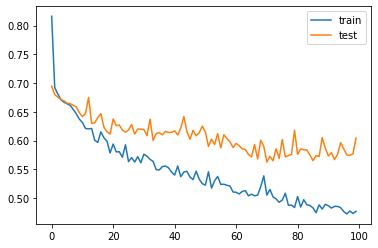

In [36]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [37]:
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test, y_pred, target_names=["Diabetes", "No Diabetes"]))

[[84 15]
 [29 26]]
              precision    recall  f1-score   support

    Diabetes       0.74      0.85      0.79        99
 No Diabetes       0.63      0.47      0.54        55

    accuracy                           0.71       154
   macro avg       0.69      0.66      0.67       154
weighted avg       0.70      0.71      0.70       154

